In [1]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

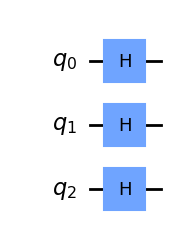

In [2]:
#큐빗 3개
qc = QuantumCircuit(3)
#모든 qubit에 Hadamard gate 적용
for qubit in range(3):
    qc.h(qubit)
qc.draw(output='mpl')

In [3]:
simulator = Aer.get_backend('aer_simulator')
qc.save_statevector()
result = execute(qc, simulator, shots=8).result()
final_state = result.get_statevector()

from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix='\\text{statevector} = ')

<IPython.core.display.Latex object>

kronecker product to calculate multi-qubit statevector : tensor product to calculate matrices


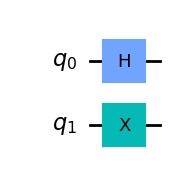

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw(output='mpl')

In [5]:
#unitary simulator 저장
qc.save_unitary()
unitary = execute(qc, simulator, shots=1024).result().get_unitary()
#gate matrix의 최종 곱 형태를 얻어낼 수 있음 : gate 연산 > matrix 연산

In [6]:
from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

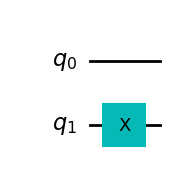

In [7]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw(output='mpl')

In [8]:
qc.save_unitary()
unitary = execute(qc, simulator, shots=1024).result().get_unitary()

array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

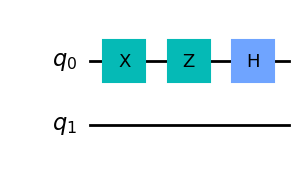

In [9]:
qc = QuantumCircuit(2)
qc.x(0)
qc.z(0)
qc.h(0)
qc.draw(output='mpl')

In [11]:
#matrix의 최종연산 곱 매트릭스를 저장해두기 : 이것을 해두지 않으면 unitary matrix를 얻을 수 없음
qc.save_unitary()

unitary = execute(qc, simulator, shots=1024).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }")

<IPython.core.display.Latex object>

CNOT gate : XOR 논리 연산과 같은 결과를 냄
control qubit, target qubit이 있어 
control qubit이 1state일 때만 target qubit에 not gate를 적용


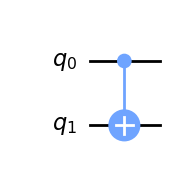

In [12]:
qc = QuantumCircuit(2)
#CNOT gate 적용, control qubit :0, target qubit:1인 경우
#
qc.cx(0,1)
qc.draw(output='mpl')

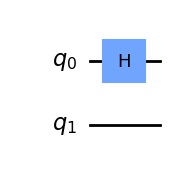

In [13]:
#superposition 상태를 만들기
qc = QuantumCircuit(2)
qc.h(0)
qc.draw(output='mpl')

In [14]:
qc.save_statevector()
final_state = execute(qc, simulator, shots=1024).result().get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector =}")

<IPython.core.display.Latex object>

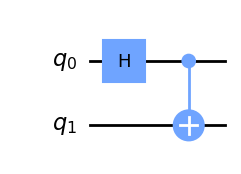

In [15]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl')

In [16]:
qc.save_statevector()
result = execute(qc, simulator, shots=1024).result()
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

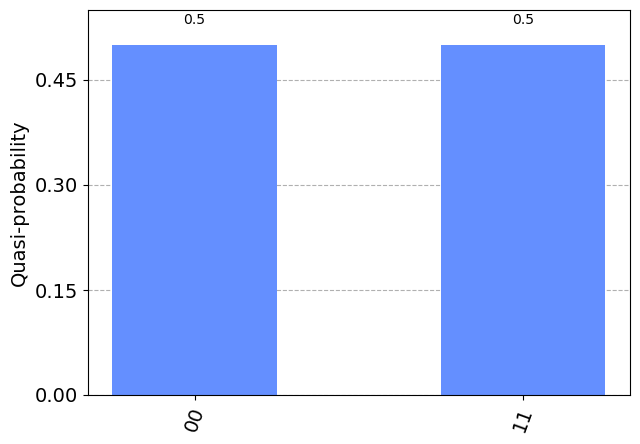

In [17]:
#qubit상태 2개가 영향을 주고받는 상태 : entanglement
#cnot gate로 qubit 0의 상태에 따라 1의 상태에 영향을 줌
plot_histogram(result.get_counts())

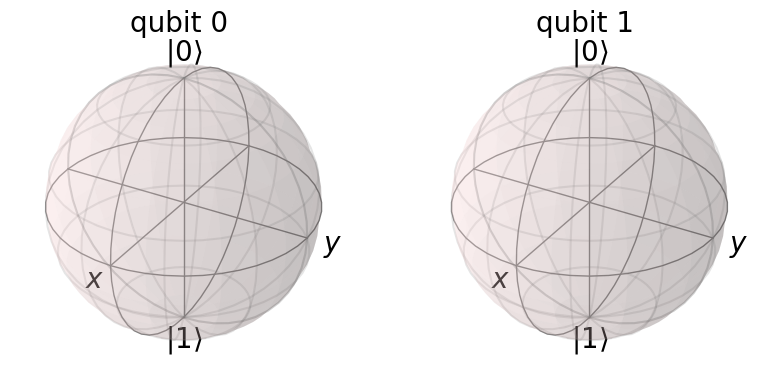

In [18]:
plot_bloch_multivector(final_state)

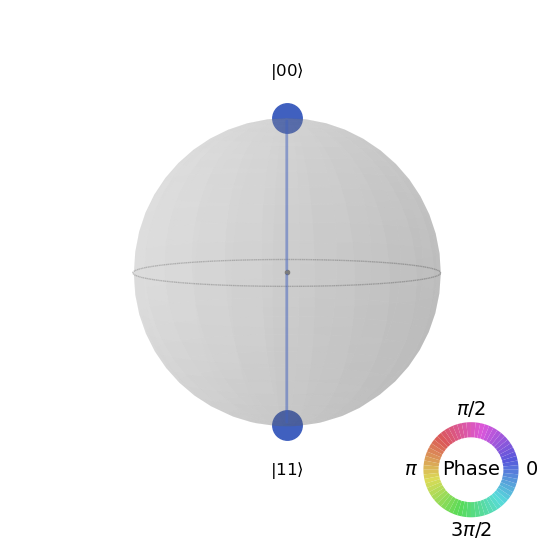

In [19]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(final_state)